# The LogView Framework #
## Welcome! ## 
This tutorial will guide you through a process mining analysis using the *LogView* framework. Throughout the tutorial, you will explore the main functionalities of this framework and learn how to interact with the **LogView** library.

## Read an event log file ##
For this tutorial, we use the Road Traffic Fine Management (RTFM) event log, which records data about the process of managing and handling road traffic fines by a local police force in Italy. The RTFM log contains 561,470 events grouped into 150,370 cases recorded between January 2000 and June 2013, including 11 different activities and 12 data attributes.

More details about the event log can be found [here](https://link.springer.com/article/10.1007/s00607-015-0441-1#Sec8).\
The event log used in this tutorial is already provided in the dataset folder.\
The raw event log files can also be downloaded [here](https://data.4tu.nl/articles/dataset/Road_Traffic_Fine_Management_Process/12683249?file=24018146).



In [1]:
import pandas as pd
import pm4py

CASE_ID_COL = 'Case ID'
TIMESTAMP_COL = 'Complete Timestamp'
ACTIVITY_COL = 'Activity'

path_to_log = "./dataset/Road_Traffic_Fine_Management_Process.csv"
df = pd.read_csv(path_to_log, dtype={'Resource': str, 'matricola': str}, parse_dates=[TIMESTAMP_COL])
df = df.sort_values([CASE_ID_COL, TIMESTAMP_COL], ignore_index=True)
log = pm4py.format_dataframe(df, case_id=CASE_ID_COL, activity_key=ACTIVITY_COL, timestamp_key=TIMESTAMP_COL)

In [2]:
# Show the first 20 rows of the log
log.head(20)

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,A1,Create Fine,561,2006-07-24 00:00:00+00:00,Variant 3,3,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A1,Create Fine,2006-07-24 00:00:00+00:00,0,0
1,A1,Send Fine,NaN,2006-12-05 00:00:00+00:00,Variant 3,3,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,A1,Send Fine,2006-12-05 00:00:00+00:00,1,0
2,A100,Create Fine,561,2006-08-02 00:00:00+00:00,Variant 1,1,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A100,Create Fine,2006-08-02 00:00:00+00:00,2,1
3,A100,Send Fine,NaN,2006-12-12 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,A100,Send Fine,2006-12-12 00:00:00+00:00,3,1
4,A100,Insert Fine Notification,NaN,2007-01-15 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+00:00,4,1
5,A100,Add penalty,NaN,2007-03-16 00:00:00+00:00,Variant 1,1,71.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Add penalty,2007-03-16 00:00:00+00:00,5,1
6,A100,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Send for Credit Collection,2009-03-30 00:00:00+00:00,6,1
7,A10000,Create Fine,561,2007-03-09 00:00:00+00:00,Variant 4,4,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10000,Create Fine,2007-03-09 00:00:00+00:00,7,2
8,A10000,Send Fine,NaN,2007-07-17 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,A10000,Send Fine,2007-07-17 00:00:00+00:00,8,2
9,A10000,Insert Fine Notification,NaN,2007-08-02 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A10000,Insert Fine Notification,2007-08-02 00:00:00+00:00,9,2


### Instantiating a LogView object ###
The LogViewBuilder class allows instantiating a LogView object, which serves as the central interface for creating LogView instances. It provides a single point of access for interacting with the different framework components.

In [3]:
from logview.utils import LogViewBuilder

log_view = LogViewBuilder.build_log_view(log)

## Evaluate Queries ##

In **LogView**, a _query_ is a combination (conjunction) of one or more predicates, which are similar to case filters. 
Predicates allow you to retrieve cases from the log that meet the conditions specified by the predicate. For example, a predicate such as 'amount ≤ 100' sets a condition on the values of the 'amount' attribute within the case.

### Query Predicates ###
The following predicates are currently supported in LogView.

**Filter on attribute values:**
- `EqToConstant`: Keeps cases that contain at least an event with the given attribute equal to a constant value.
- `NotEqToConstant`: Keeps cases that do not contain any event with the given attribute equal to a constant value.
- `GreaterEqualToConstant`: Keeps cases that contain at least an event with the given attribute greater than or equal to a constant value.
- `GreaterThanConstant`: Keeps cases that contain at least an event with the given attribute greater than a constant value.
- `LessEqualToConstant`: Keeps cases that contain at least an event with the given attribute lower than or equal to a constant value.
- `LessThanConstant`: Keeps cases that contain at least an event with the given attribute lower than a constant value.
- `StartWith`: Keeps cases starting with the specified activities.
- `EndWith`: Keeps cases ending with a given activity.
- `DurationWithin`: Keeps cases with durations within a specified range in seconds.

**Union**
- `Union`: represents a logical OR operation between multiple predicates. 

Examples: 

- `EndWith(['Send Fine', 'Appeal to Judge'])` retrieves all the cases that end with activity 'Send Fine' or 'Appeal to Judge'.
- `LessEqualToConstant('amount', '100')` retrieves all the cases where there is at least an event with attribute amount ≤ 100.

### How to run your first query with the Query Evaluator ###

The _Query_ class allows you to create a query as a conjunction of predicates. It also prompts the user to give the query an identifier, which is used to record the query in the registry.

The _evaluate_query_ method implements our _Query Evaluator_: it evaluates a given query against a source protocol, which is a DataFrame containing event data. It returns a result set and its complement, prompting the user to provide an identifier for the query and result set, which is used to record the result set in the registry.

In the example below, the user runs a query with two predicates:
- `EqToConstant('Activity', 'Send for Credit Collection')`, which checks if the case has at least one event where Activity = 'Send for Credit Collection'
- `NotEqToConstant('Activity', 'Payment')`, which checks that the case does not have any event where Activity = 'Payment'.


The `log_view.evaluate_query()` method evaluates the query on the entire log `log`, producing a result set (`result_set_query_t`) and its complement `complement_t`.
- `'SCC_and_no_Payment'` is the identifier of the query provided by the user;
- `'rs_SCC_and_no_Payment'` is the identifier of the result set provided by the user.

These identifiers are recorded in the Registry and can be used aside of variable names to retrieve result sets of interest for characterization and comparison, as shown below.

In [4]:
from logview.predicate import *

#  Find all cases that end with activity Payment or Send for Credit Collection
query_t = Query('SCC_and_no_Payment', [EqToConstant('Activity', 'Send for Credit Collection'), NotEqToConstant('Activity', 'Payment')])
result_set_query_t, complement_t = log_view.evaluate_query('rs_SCC_and_no_Payment', log, query_t)

result_set_query_t.head(10)

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
2,A100,Create Fine,561,2006-08-02 00:00:00+00:00,Variant 1,1,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A100,Create Fine,2006-08-02 00:00:00+00:00,2,1
3,A100,Send Fine,NaN,2006-12-12 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,A100,Send Fine,2006-12-12 00:00:00+00:00,3,1
4,A100,Insert Fine Notification,NaN,2007-01-15 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+00:00,4,1
5,A100,Add penalty,NaN,2007-03-16 00:00:00+00:00,Variant 1,1,71.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Add penalty,2007-03-16 00:00:00+00:00,5,1
6,A100,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Send for Credit Collection,2009-03-30 00:00:00+00:00,6,1
18,A10004,Create Fine,537,2007-03-20 00:00:00+00:00,Variant 1,1,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10004,Create Fine,2007-03-20 00:00:00+00:00,18,4
19,A10004,Send Fine,NaN,2007-07-17 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,A10004,Send Fine,2007-07-17 00:00:00+00:00,19,4
20,A10004,Insert Fine Notification,NaN,2007-07-24 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A10004,Insert Fine Notification,2007-07-24 00:00:00+00:00,20,4
21,A10004,Add penalty,NaN,2007-09-22 00:00:00+00:00,Variant 1,1,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A10004,Add penalty,2007-09-22 00:00:00+00:00,21,4
22,A10004,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A10004,Send for Credit Collection,2009-03-30 00:00:00+00:00,22,4


### How to run multiple queries ###
Here we provide examples of other queries that can be run.

- The first query (`query_r`) selects cases where there is at least one event having Activity = 'Send for Credit Collection' from the log.
- The second query (`query_q`) selects cases wihtout events having Activity = 'Payment' from the result set of query r. Query q is a **refinement** of query r.
- The third query (`query_s`) selects cases wihtout events having Activity = 'Payment' from the log. Query s is the same as query q, but is executed on a different source log.

In [5]:
from logview.predicate import *

# Cases with activity Send for Credit Collection
query_r = Query('SCC', EqToConstant('Activity', 'Send for Credit Collection'))
result_set_query_r, complement_result_set_query_r = log_view.evaluate_query('rs_SCC', log, query_r)

## Refinement example
# Cases with activities Send for Credit Collection and without activity Payment
query_q = Query('SCC_and_no_Payment_2', NotEqToConstant('Activity', 'Payment'))
result_set_query_q, complement_result_set_query_q = log_view.evaluate_query('rs_SCC_and_no_Payment_2', result_set_query_r, query_q)

# Cases without activity Payment
query_s = Query('no_Payment', NotEqToConstant('Activity', 'Payment'))
result_set_query_s, complement_result_set_query_s = log_view.evaluate_query('rs_no_Payment', log, query_s)


In [6]:
# Display the first 10 lines of each result set (for debug)

display(result_set_query_r.head(10))
display(result_set_query_q.head(10))
display(result_set_query_s.head(10))

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
2,A100,Create Fine,561,2006-08-02 00:00:00+00:00,Variant 1,1,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A100,Create Fine,2006-08-02 00:00:00+00:00,2,1
3,A100,Send Fine,NaN,2006-12-12 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,A100,Send Fine,2006-12-12 00:00:00+00:00,3,1
4,A100,Insert Fine Notification,NaN,2007-01-15 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+00:00,4,1
5,A100,Add penalty,NaN,2007-03-16 00:00:00+00:00,Variant 1,1,71.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Add penalty,2007-03-16 00:00:00+00:00,5,1
6,A100,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Send for Credit Collection,2009-03-30 00:00:00+00:00,6,1
18,A10004,Create Fine,537,2007-03-20 00:00:00+00:00,Variant 1,1,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10004,Create Fine,2007-03-20 00:00:00+00:00,18,4
19,A10004,Send Fine,NaN,2007-07-17 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,A10004,Send Fine,2007-07-17 00:00:00+00:00,19,4
20,A10004,Insert Fine Notification,NaN,2007-07-24 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A10004,Insert Fine Notification,2007-07-24 00:00:00+00:00,20,4
21,A10004,Add penalty,NaN,2007-09-22 00:00:00+00:00,Variant 1,1,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A10004,Add penalty,2007-09-22 00:00:00+00:00,21,4
22,A10004,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A10004,Send for Credit Collection,2009-03-30 00:00:00+00:00,22,4


,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
2,A100,Create Fine,561,2006-08-02 00:00:00+00:00,Variant 1,1,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A100,Create Fine,2006-08-02 00:00:00+00:00,2,1
3,A100,Send Fine,NaN,2006-12-12 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,A100,Send Fine,2006-12-12 00:00:00+00:00,3,1
4,A100,Insert Fine Notification,NaN,2007-01-15 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+00:00,4,1
5,A100,Add penalty,NaN,2007-03-16 00:00:00+00:00,Variant 1,1,71.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Add penalty,2007-03-16 00:00:00+00:00,5,1
6,A100,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Send for Credit Collection,2009-03-30 00:00:00+00:00,6,1
18,A10004,Create Fine,537,2007-03-20 00:00:00+00:00,Variant 1,1,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10004,Create Fine,2007-03-20 00:00:00+00:00,18,4
19,A10004,Send Fine,NaN,2007-07-17 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,A10004,Send Fine,2007-07-17 00:00:00+00:00,19,4
20,A10004,Insert Fine Notification,NaN,2007-07-24 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A10004,Insert Fine Notification,2007-07-24 00:00:00+00:00,20,4
21,A10004,Add penalty,NaN,2007-09-22 00:00:00+00:00,Variant 1,1,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A10004,Add penalty,2007-09-22 00:00:00+00:00,21,4
22,A10004,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A10004,Send for Credit Collection,2009-03-30 00:00:00+00:00,22,4


,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,A1,Create Fine,561,2006-07-24 00:00:00+00:00,Variant 3,3,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A1,Create Fine,2006-07-24 00:00:00+00:00,0,0
1,A1,Send Fine,NaN,2006-12-05 00:00:00+00:00,Variant 3,3,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,A1,Send Fine,2006-12-05 00:00:00+00:00,1,0
2,A100,Create Fine,561,2006-08-02 00:00:00+00:00,Variant 1,1,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A100,Create Fine,2006-08-02 00:00:00+00:00,2,1
3,A100,Send Fine,NaN,2006-12-12 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,A100,Send Fine,2006-12-12 00:00:00+00:00,3,1
4,A100,Insert Fine Notification,NaN,2007-01-15 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+00:00,4,1
5,A100,Add penalty,NaN,2007-03-16 00:00:00+00:00,Variant 1,1,71.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Add penalty,2007-03-16 00:00:00+00:00,5,1
6,A100,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Send for Credit Collection,2009-03-30 00:00:00+00:00,6,1
12,A10001,Create Fine,537,2007-03-19 00:00:00+00:00,Variant 8,8,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10001,Create Fine,2007-03-19 00:00:00+00:00,12,3
13,A10001,Send Fine,NaN,2007-07-17 00:00:00+00:00,Variant 8,8,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,A10001,Send Fine,2007-07-17 00:00:00+00:00,13,3
14,A10001,Insert Fine Notification,NaN,2007-07-25 00:00:00+00:00,Variant 8,8,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A10001,Insert Fine Notification,2007-07-25 00:00:00+00:00,14,3


## Label a Result Set ##

The `label_result_set` method allows the user to assign a descriptive tag to a result set. 

In this way, users can give meaning to result sets, adding a layer of abstraction beyond simple result set names. 

Users may tag different result sets with the same label: this facilitates the retrieval and comparison of result sets in scenarios where multiple result sets are part of the same exploration or hypothesis testing iteration.

In the current implementation, labels are stored in a vector associated to the result set in the registry. 
The user can add as many labels as desired to a result set.

In [7]:
log_view.label_result_set(result_set_query_t, 'SCC and Unpaid')
log_view.label_result_set(result_set_query_r, 'SCC')
log_view.label_result_set(result_set_query_q, 'SCC and Unpaid')
log_view.label_result_set(result_set_query_s, 'Unpaid')

## View the Registry ##
The **Registry** is the backbone of the framework, allowing users to record queries made during analysis, along with their evaluations by the **Query Evaluator**.\
The registry also facilitates access to all recorded information.

The user can access the registry at any time during the analysis using the following method.

In [8]:
summary = log_view.get_summary()

+----+--------------------+----------------------+-------------------------+--------------------+
|    | source_log         | query                | result_set              | labels             |
|----+--------------------+----------------------+-------------------------+--------------------|
|  0 | initial_source_log | SCC_and_no_Payment   | rs_SCC_and_no_Payment   | ['SCC and Unpaid'] |
|  1 | initial_source_log | SCC                  | rs_SCC                  | ['SCC']            |
|  2 | rs_SCC             | SCC_and_no_Payment_2 | rs_SCC_and_no_Payment_2 | ['SCC and Unpaid'] |
|  3 | initial_source_log | no_Payment           | rs_no_Payment           | ['Unpaid']         |
+----+--------------------+----------------------+-------------------------+--------------------+
+----+----------------------+------------------------------------------------------------------------------------+
|    | query                | predicates                                                             

## Characterize a Result Set ##
Our framework allows characterizing a result set by comparing it to a reference log on many dimensions.
The reference log is any log that the user wants to use as a "baseline" for the comparison: it can be the original log given as input to the analysis, the complement of the result set, as well as any other result set generated during the analysis that the user can get from the **Registry**.

A result set characterization is performed using the `characterize_result_set_with_reference_log` function. 

The user can specify the dimensions along which to compare by adding the name of the component to the method as a parameter.

### Characterize by Cardinality ###

**Cardinality** measures the number of cases in the result set compared to the reference log.
To characterize a result set based on cardinality, the user can call the method adding the parameter `'set-cardinality'` to the method.


In [9]:
# Characterize the result set 'result_set_query_r' by comparison with the source log using the variable name of the result set
cardinality_result_set_r = log_view.characterize_result_set_with_reference_log(result_set_query_r, log, characterizer_name='set-cardinality')

Number of case_id in rs_SCC: 59013
Number of case_id in initial_source_log: 150370


In [10]:
# Characterize the result set 'result_set_query_r' by comparison with the source log using the identifier of the result set
cardinality_result_set_r = log_view.characterize_result_set_with_reference_log('rs_SCC', log, characterizer_name='set-cardinality')

Number of case_id in rs_SCC: 59013
Number of case_id in initial_source_log: 150370


In [11]:
# Characterize the result set 'result_set_query_r' by comparison with the complement log with respect to query r using the identifier of the result set and the variable name of the complement
cardinality_result_set_r = log_view.characterize_result_set_with_reference_log('rs_SCC', complement_result_set_query_r, characterizer_name='set-cardinality')

Number of case_id in rs_SCC: 59013
Number of case_id in complement_rs_SCC: 91357


### Characterize by Attribute Distributions and Summary Values ###

**Attribute Distributions and Summary Values** show the distribution and summary statistics of data attributes within the result set and the reference log. To focus only on summary statistics, the user can call the method adding the parameter `'summary-statistics'` to the method.

In [12]:
# Characterize the result set 'result_set_query_r' by comparison with the source log
attribute_summary_result_set_test = log_view.characterize_result_set_with_reference_log(result_set_query_r, log, characterizer_name='summary-statistics')

Summary statistics of rs_SCC
+------+-----------+-----------+-----------+-----------------+-----------+----------------------+
|      |    amount |   article |   expense |   paymentAmount |    points |   totalPaymentAmount |
|------+-----------+-----------+-----------+-----------------+-----------+----------------------|
| mean |   74.1308 |  115.235  |  11.7316  |         53.5694 |  0.124566 |              1.93415 |
| std  |  106.636  |   67.1677 |   4.02636 |         40.0889 |  0.719806 |             12.7846  |
| min  |    0      |    7      |   0       |          1.32   |  0        |              0       |
| max  | 8000      |  401      |  60       |        727      | 10        |            727       |
+------+-----------+-----------+-----------+-----------------+-----------+----------------------+
Summary statistics of initial_source_log
+------+-----------+-----------+-----------+-----------------+------------+----------------------+
|      |    amount |   article |   expense |   

In the example below we characterize result sets: `'rs_SCC_no_Payment'`, `'rs_SCC_no_Payment_2`

Both result sets include the same set of cases, i.e., cases that have activitiy 'Send for Credit Collection' and do not have activity 'Payment'.
As such, the summary values shown coincide.

- The first is obtained by running the query_t = (Activity in { 'Send for Credit Collection' }) and (Activity not in { 'Payment' })
- The second one is obtained by running query_q = (Activity not in { 'Payment' }) on the result set of query_r = (Activity in { 'Send for Credit Collection' })

In [13]:
# Characterize the result set 'rs_SCC_and_no_Payment' by comparison with the result set 'rs_SCC_no_Payment_2'.
attribute_summary_result_set_test = log_view.characterize_result_set_with_reference_log('rs_SCC_and_no_Payment', 'rs_SCC_and_no_Payment_2', characterizer_name='summary-statistics')

Summary statistics of rs_SCC_and_no_Payment
+------+-----------+-----------+-----------+-----------------+-----------+----------------------+
|      |    amount |   article |   expense |   paymentAmount |    points |   totalPaymentAmount |
|------+-----------+-----------+-----------+-----------------+-----------+----------------------|
| mean |   74.2464 |  115.3    |  11.7311  |             nan |  0.125512 |                    0 |
| std  |  107.514  |   67.1718 |   4.04638 |             nan |  0.724116 |                    0 |
| min  |    0      |    7      |   0       |             nan |  0        |                    0 |
| max  | 8000      |  401      |  60       |             nan | 10        |                    0 |
+------+-----------+-----------+-----------+-----------------+-----------+----------------------+
Summary statistics of rs_SCC_and_no_Payment_2
+------+-----------+-----------+-----------+-----------------+-----------+----------------------+
|      |    amount |   artic

### Characterize by Examples ###

**Examples** are selected cases (i.e., process instances) that allow the user to characterize a result set qualitatively based on its attributes, event sequencing, timing, and other process perspectives. 

*Random Sampling strategies*

The implemented sampling strategy retrieves from the result set and the reference log. By first checking their set relationships, it selects
- Examples from the result set that are not in the reference log, 
- Examples from the reference log that are not in the result set,
- Examples from the intersection of the two sets, if it exists.

Hereafter, we reported how the characterizer `'random-example-retriever'` can be used to retrieve some examples of traces:

In [14]:
# Characterize the result set 'result_set_query_r' by comparison with the original log using variable names.
examples_result_set_test = log_view.characterize_result_set_with_reference_log(result_set_query_r, log, characterizer_name='random-example-retriever')

Sample from initial_source_log
+--------+-----------+-------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+----------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity    |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense |   lastSent | lifecycle:transition   |   matricola |   notificationType |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name   | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+-------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+----------

In [15]:
# Characterize the result set 'rs_SCC' by comparison with the result set 'rs_no_Payment'.
examples_result_set_test = log_view.characterize_result_set_with_reference_log('rs_SCC', 'rs_no_Payment', characterizer_name='random-example-retriever')

Sample from rs_SCC
+--------+-----------+----------------------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+----------------------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity                   |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense | lastSent   | lifecycle:transition   |   matricola | notificationType   |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name               | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+----------------------------+------------+---------------------------+-----------+-----------------+----------+----

In [16]:
# Characterize the result set 'rs_SCC_and_no_Payment' by comparison with the result set 'rs_SCC_and_no_Payment_2'.
examples_result_set_test = log_view.characterize_result_set_with_reference_log('rs_SCC_and_no_Payment', 'rs_SCC_and_no_Payment_2', characterizer_name='random-example-retriever')

# Since the two result sets are fully overlapping, i.e., they coincide with their intersection, only one example taken from the intersection is shown.

Sample in rs_SCC_and_no_Payment and rs_SCC_and_no_Payment_2
+--------+-----------+----------------------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+----------------------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity                   |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense | lastSent   | lifecycle:transition   |   matricola | notificationType   |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name               | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+----------------------------+------------+---------------------------+----

The user can specify the number of examples they want to retrieve as follows.

In [17]:
from logview.result_set_characterizer import RandomExampleRetriever

example_retriever = RandomExampleRetriever(samples = 5)
log_view.attach_result_set_characterizer('random-example-retriever', example_retriever)

examples_result_set_test = log_view.characterize_result_set_with_reference_log('rs_SCC', 'rs_SCC_and_no_Payment_2', characterizer_name='random-example-retriever')

# Resetting the number of examples to 1
example_retriever = RandomExampleRetriever(samples = 1)
log_view.attach_result_set_characterizer('random-example-retriever', example_retriever)

Sample from rs_SCC
+--------+-----------+----------------------------+------------+---------------------------+------------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+----------------------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity                   |   Resource | Complete Timestamp        | Variant    |   Variant index |   amount |   article | dismissal   |   expense | lastSent   | lifecycle:transition   |   matricola | notificationType   |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name               | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+----------------------------+------------+---------------------------+------------+-----------------+----------+-

Similarly, the user can retrieve examples in a more sophisticated way. 
For example, the `most-frequent-variant-example-retriever` characterizer can be used to randomly retrieve an example trace from the most frequent variant.  

The `most-frequent-variant-example-retriever` implements a sampling strategy from the result set and the reference protocol.\
By first checking their set relationships, it selects
- One example from the most frequent variant in the result set that is not in the reference log, 
- One example from the most frequent variant in the reference log that is not in the result set,
- an example from the most frequent variant in the intersection of the two sets, if it exists.


Below we have reported how the characterizer `'most-frequent-example-retriever'` can be used to retrieve some examples of traces:

In [18]:
from logview.result_set_characterizer import MostFrequentVariantExampleRetriever

example_retriever = MostFrequentVariantExampleRetriever(k = 5)
log_view.attach_result_set_characterizer('most-frequent-example-retriever', example_retriever)

examples_result_set_test = log_view.characterize_result_set_with_reference_log('rs_SCC_and_no_Payment', 'rs_SCC_and_no_Payment_2', characterizer_name='most-frequent-example-retriever')

Sample in rs_SCC_and_no_Payment and rs_SCC_and_no_Payment_2
+--------+-----------+----------------------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+----------------------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity                   |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense | lastSent   | lifecycle:transition   |   matricola | notificationType   |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name               | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+----------------------------+------------+---------------------------+----

### Characterize by All Dimensions ###

By default, the `characterize_result_set_with_reference_log` method returns all the dimensions described above.

In [19]:
properties_result_set_test = log_view.characterize_result_set_with_reference_log(result_set_query_t, log)

properties_result_set_q = log_view.characterize_result_set_with_reference_log(result_set_query_q, log)

properties_result_set_r = log_view.characterize_result_set_with_reference_log(result_set_query_r, log)

properties_result_set_s = log_view.characterize_result_set_with_reference_log(result_set_query_s, log)

Sample from initial_source_log
+--------+-----------+--------------------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+--------------------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity                 |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense | lastSent   | lifecycle:transition   |   matricola | notificationType   |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name             | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+--------------------------+------------+---------------------------+-----------+-----------------+----------+--

### Characterize by User-Defined Properties ###

Our framework allows characterization of a result set based on its comparison to a reference protocol also based on the extent to which a given custom property applies to that set.

**User-defined properties** are properties expressed as query predicates that can refer to attributes that are not part of the query run to generate the result set. This allows the result set to be compared to the reference log from a possibly different process perspective.

#### Define a property as a new custom predicate ####

In the following example, we define a _Is_Fully_Paid_ property that combines data attribute values as follows

_Is_Fully_Paid_: max(amount) + sum(expense) <= max(totalPaymentAmount)

Where:
- _max(amount)_: Represents the maximum value of the amount event attribute, ensuring that any penalties are included in the amount to be paid.
- _sum(expense)_: Represents the sum of all possible postage expenses, although typically only one expense is present in the log.
- _max(totalPaymentAmount)_: Indicates the maximum value of the totalPaymentAmount attribute, which records the total cumulative amount paid by the offender. Since this value is cumulative, taking the maximum value is equivalent to taking the last payment amount recorded.

Once saved as new classes, properties can also be used within queries.

In [20]:
from logview.interfaces import Predicate

class IsFullyPaid(Predicate):

    def evaluate(self, log: pd.DataFrame) -> pd.DataFrame:
        case_id_glue = 'case:concept:name'

        # Get the maxium value of attribute amount to include the penalty
        max_amount = log.groupby(case_id_glue)['amount'].max()
        # Get the sum of all postal expenses
        sum_expenses = log.groupby(case_id_glue)['expense'].sum()
        # Get the maximum value of the amount paid by the offender
        max_totalPaymentAmount = log.groupby(case_id_glue)['totalPaymentAmount'].max()

        to_check = pd.concat([max_amount, sum_expenses, max_totalPaymentAmount], axis=1)

        # A fine is paid as long as max(amount) + sum(expense) <= max(totalPaymentAmount)
        paid_fines = to_check[to_check['amount'] + to_check['expense'] <= to_check['totalPaymentAmount']]
        case_id_to_keep = paid_fines['amount'].index
        return log[log[case_id_glue].isin(case_id_to_keep)]

    def as_string(self) -> str:
        return 'max(amount) + sum(expense) <= max(totalPaymentAmount)'

#### Instantiate a property evaluator with the newly defined property ####

In [21]:
from logview.result_set_characterizer import PropertiesEvaluator

log_view.attach_result_set_characterizer('property_evaluator', PropertiesEvaluator([IsFullyPaid()]))

#### Evaluate the property with the Result Set Characterizer ####
The property is evaluated on the result set and the reference log. 

We present the property's adherence as both the absolute number of cases and the fraction of cases to which it applies (#cases where the property applies / #cases in the set).


In the following example, the property '_Is_Fully_Paid_' is applicable to 3 cases in the result set rs_scc, representing approximately 0% of the result set's total size (59013 cases). 
Similarly, the property holds true for 60247 cases in the initial source log, accounting for approximately 0.401% of the log's total cases.

In [22]:
# Characterizing result_set_query_r based on the extent to which property 'IsFullyPaid' holds in the set compared to the original log
_ = log_view.characterize_result_set_with_reference_log(result_set_query_r, log, characterizer_name='property_evaluator')

+-------------------------------------------------------+----------+----------------------+
|                                                       | rs_SCC   | initial_source_log   |
|-------------------------------------------------------+----------+----------------------|
| max(amount) + sum(expense) <= max(totalPaymentAmount) | (3, 0.0) | (60247, 0.401)       |
+-------------------------------------------------------+----------+----------------------+


In [23]:
# Characterizing result_set_query_r based on the extent to which property 'IsFullyPaid' holds in the set compared to the result_set_query_t
_ = log_view.characterize_result_set_with_reference_log(result_set_query_r, result_set_query_t, characterizer_name='property_evaluator')

+-------------------------------------------------------+----------+-------------------------+
|                                                       | rs_SCC   | rs_SCC_and_no_Payment   |
|-------------------------------------------------------+----------+-------------------------|
| max(amount) + sum(expense) <= max(totalPaymentAmount) | (3, 0.0) | (1, 0.0)                |
+-------------------------------------------------------+----------+-------------------------+


Use property _Is_Fully_Paid_ to run a new query

In [24]:
query_isFullyPaid = Query('Fully_Paid', [IsFullyPaid()])
rs_fully_paid, complement_fully_paid = log_view.evaluate_query('rs_fully_paid', log, query_isFullyPaid)

rs_fully_paid.head(10)

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
7,A10000,Create Fine,561,2007-03-09 00:00:00+00:00,Variant 4,4,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10000,Create Fine,2007-03-09 00:00:00+00:00,7,2
8,A10000,Send Fine,NaN,2007-07-17 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,A10000,Send Fine,2007-07-17 00:00:00+00:00,8,2
9,A10000,Insert Fine Notification,NaN,2007-08-02 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A10000,Insert Fine Notification,2007-08-02 00:00:00+00:00,9,2
10,A10000,Add penalty,NaN,2007-10-01 00:00:00+00:00,Variant 4,4,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A10000,Add penalty,2007-10-01 00:00:00+00:00,10,2
11,A10000,Payment,NaN,2008-09-09 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,NaN,...,NaN,87.0,NaN,87.0,NaN,A10000,Payment,2008-09-09 00:00:00+00:00,11,2
23,A10005,Create Fine,537,2007-03-20 00:00:00+00:00,Variant 2,2,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10005,Create Fine,2007-03-20 00:00:00+00:00,23,5
24,A10005,Payment,NaN,2007-03-21 00:00:00+00:00,Variant 2,2,NaN,NaN,NaN,NaN,...,NaN,36.0,NaN,36.0,NaN,A10005,Payment,2007-03-21 00:00:00+00:00,24,5
25,A10007,Create Fine,537,2007-03-20 00:00:00+00:00,Variant 2,2,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10007,Create Fine,2007-03-20 00:00:00+00:00,25,6
26,A10007,Payment,NaN,2007-03-23 00:00:00+00:00,Variant 2,2,NaN,NaN,NaN,NaN,...,NaN,36.0,NaN,36.0,NaN,A10007,Payment,2007-03-23 00:00:00+00:00,26,6
32,A10009,Create Fine,537,2007-03-20 00:00:00+00:00,Variant 5,5,22.0,7.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10009,Create Fine,2007-03-20 00:00:00+00:00,32,8


## Compare two Result Sets ## 

Our framework allows the user to compare any two result sets generated during analysis to understand their relationship and infer dependencies between the queries that generated them.

The `compare_two_result_sets` method works as follows:

1. **Source Log Check**: erify that the two result sets come from the same source log - this is critical for properly interpreting the comparison results.
2. **Ancestor Log Identification**: If the result sets are generated from different source logs, identify their first common ancestor log to ensure contextual consistency for comparison. The result sets and their complements are compared in the context of their common ancestor.
3. **Intersection Matrix Construction**: Construct an intersection matrix considering both result sets and their complements to facilitate direct comparison.
4. **Result Set Relationships Analysis**: Analyze the intersection matrix to determine result set relationships and estimate query dependencies based on intersection cardinality.
5. **Query Dependency Probability**: Infer query dependencies based on the probability calculated from the intersection matrix.

The following example compares `result_set_query_r`with `result_set_query_s`.

The output shows the **Intersection matrix**, where we name q ='rs_scc' and r ='no_payment'.

The matrix always compares the two result sets considering their complement w.r.t. their common ancestor.\
It can be read as follows:
- q and r: Indicates the count of cases that satisfy both query q ('rs_scc') and query r ('no_payment'). In this example, there are 56887 cases in this intersection.
- q and !r: Denotes the count of cases satisfying query q ('rs_scc') but not query r ('no_payment'). In this example, there are 2126 cases in this intersection.
- !q and r: Represents the count of cases not meeting query q ('rs_scc') but satisfying query r ('no_payment'). In this example, there are 23768 cases in this intersection.
- !q and !r: Indicates the count of cases that do not satisfy either query q or r. In this example, there are 67589 in this intersection.

Then, in the output, we see the **Analysis Context**, i.e., the common ancestor source, which defines the context within which two queries are compared, the query to get from the original log and the common ancestor, and the queries run to obtain the two result sets from the common ancestor.\
In the example, the common ancestor log query is empty because the two result sets are generated from the same source log. Also, the queries to obtain the result sets from the common ancestor, i.e., the source log, correspond to the queries evaluated on the latter to produce the result sets.

Finally, we see the **Query Dependency Probability** based on the size of the intersection reported in the matrix.\
In the example, we see that query q implies query r with a probability of 96.397%, since the number of cases in the intersection (56887) is very close to the number of cases in the result set result_set_query_q (59013). Instead, based on the same cardinalities, query r implies query q with a probability of 70.531%.

In [25]:
# Example showing the comparison of two queries generated from the same source log
two_result_sets_comparison = log_view.compare_two_result_sets(result_set_query_r, result_set_query_s)

Result set comparison between q: 'rs_SCC' and r: 'rs_no_Payment'

Intersection Matrix:
+-----------+----------------------+
|           |   Intersection Count |
|-----------+----------------------|
| q and r   |                56887 |
| q and !r  |                 2126 |
| !q and r  |                23768 |
| !q and !r |                67589 |
+-----------+----------------------+

Analysis Context:
	Query from initial log to common ancestor 'initial_source_log':  
	Queries from common ancestor to 'rs_SCC': (Activity in { 'Send for Credit Collection' }) 
	Queries from common ancestor to 'rs_no_Payment': (Activity not in { 'Payment' }) 

Query Dependency Probability:
 query_q --> query_r with 96.397 % query_r --> query_q with 70.531 %


In [26]:
# Example showing the comparison of two queries generated from different source logs
two_result_sets_comparison = log_view.compare_two_result_sets(result_set_query_r, result_set_query_q)

Result set comparison between q: 'rs_SCC' and r: 'rs_SCC_and_no_Payment_2'

Intersection Matrix:
+-----------+----------------------+
|           |   Intersection Count |
|-----------+----------------------|
| q and r   |                56887 |
| q and !r  |                 2126 |
| !q and r  |                    0 |
| !q and !r |                    0 |
+-----------+----------------------+

Analysis Context:
	Query from initial log to common ancestor 'rs_SCC': (Activity in { 'Send for Credit Collection' }) 
	Queries from common ancestor to 'rs_SCC':  
	Queries from common ancestor to 'rs_SCC_and_no_Payment_2': (Activity not in { 'Payment' }) 

Query Dependency Probability:
 query_q --> query_r with 96.397 % query_r --> query_q with 100.000 %


## Visualize the Result Sets obtained during the analysis and their overlaps ##

Our framework allows the analyst to visualize the result sets stored in the registry and their intersections using an [UpSet Plot](https://upset.app/implementations/#UpSetPlot). The UpSet Plot shows the intersections between multiple result sets, allowing the user to identify situations where multiple queries occur simultaneously.

The user can plot all result sets generated during the analysis and their intersections, or use labels to visualize intersections between result sets of interest.


An UpSet plot visualizes set intersections using a matrix format.\
Each row represents a set, with bars indicating its size. The columns represent potential intersections, with filled cells indicating sets that are part of the intersection. 

In the plot shown below we have five sets that correspond to the result sets in our registry:\
The two sets SCC_and_no_Payment and SCC_and_no_Payment_2 have the same size in the plot and fully overlap as they are actually the same set, obtained by executing the same queries on different source logs.

Create an UpSet plot with all the result sets produced during the analysis.

+----+----------------------+------------------------------------------------------------------------------------+
|    | query name           | predicates                                                                         |
|----+----------------------+------------------------------------------------------------------------------------|
|  0 | SCC_and_no_Payment   | (Activity in { 'Send for Credit Collection' }) and (Activity not in { 'Payment' }) |
|  1 | SCC                  | (Activity in { 'Send for Credit Collection' })                                     |
|  2 | SCC_and_no_Payment_2 | (Activity not in { 'Payment' })                                                    |
|  3 | no_Payment           | (Activity not in { 'Payment' })                                                    |
|  4 | Fully_Paid           | max(amount) + sum(expense) <= max(totalPaymentAmount)                              |
+----+----------------------+---------------------------------------------------

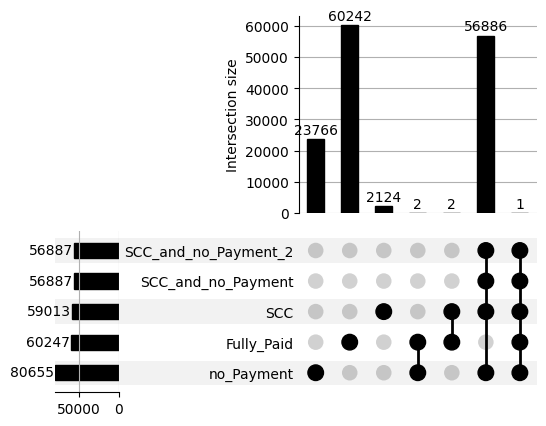

In [27]:
# Showing the UpSet plot with all the result sets obtained during the analysis
log_view.compare_result_sets()

Create an UpSet plot with the result sets `result_set_query_q` and `result_set_query_r`.

+----+--------------------+------------------------------------------------------------------------------------+
|    | query name         | predicates                                                                         |
|----+--------------------+------------------------------------------------------------------------------------|
|  0 | SCC_and_no_Payment | (Activity in { 'Send for Credit Collection' }) and (Activity not in { 'Payment' }) |
|  1 | SCC                | (Activity in { 'Send for Credit Collection' })                                     |
+----+--------------------+------------------------------------------------------------------------------------+


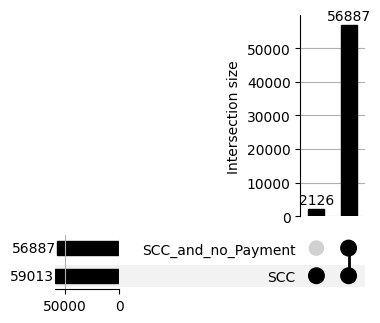

In [28]:
# Showing the UpSet plot with selected result sets obtained during the analysis, specified by their name
log_view.compare_result_sets(['rs_SCC_and_no_Payment', 'rs_SCC'])

Create an UpSet plot with all the result sets labeled as 'SCC and Unpaid'.

+----+----------------------+------------------------------------------------------------------------------------+
|    | query name           | predicates                                                                         |
|----+----------------------+------------------------------------------------------------------------------------|
|  0 | SCC_and_no_Payment   | (Activity in { 'Send for Credit Collection' }) and (Activity not in { 'Payment' }) |
|  1 | SCC_and_no_Payment_2 | (Activity not in { 'Payment' })                                                    |
+----+----------------------+------------------------------------------------------------------------------------+


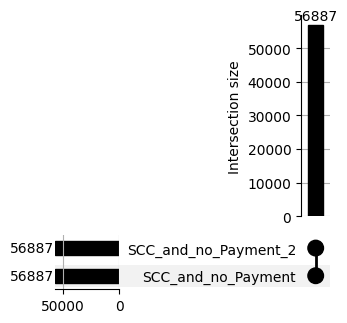

In [29]:
# Showing the UpSet plot for all the result sets labeled as 'SCC and Unpaid'
log_view.compare_result_sets_with_label(requested_label='SCC and Unpaid')